# Métricas de Regressão
___
* Mean Absolute Error
* Mean Squared Error
* Root Mean Squared Error
* R2

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

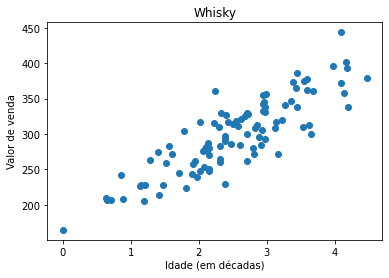

In [51]:
x,y = make_regression(n_samples=100,n_features=1,n_informative=1,bias=300,noise=30,random_state=42,tail_strength=0.8,shuffle=True)
x += x.min()*-1
f, ax = plt.subplots()
ax.scatter(x,y)
ax.set_title('Whisky')
ax.set_xlabel('Idade (em décadas)')
ax.set_ylabel('Valor de venda')
plt.show()

In [52]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)

In [53]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(80, 1) (80,)
(20, 1) (20,)


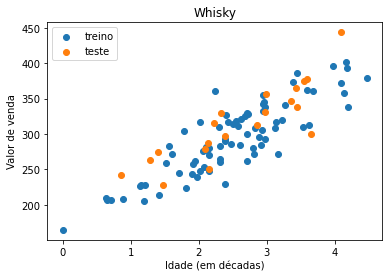

In [54]:
f, ax = plt.subplots()
ax.scatter(x_train,y_train,color='tab:blue',label='treino')
ax.scatter(x_test,y_test,color='tab:orange',label='teste')
ax.set_title('Whisky')
ax.set_xlabel('Idade (em décadas)')
ax.set_ylabel('Valor de venda')
plt.legend()
plt.show()

# Modelagem

In [55]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [56]:
y_pred = lr.predict(x_test)

# Mean Absolute Error

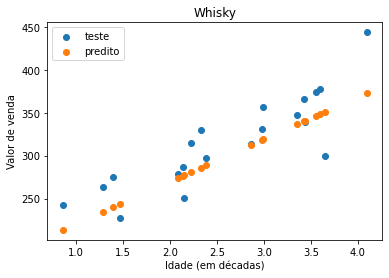

In [76]:
f, ax = plt.subplots()
ax.scatter(x_test,y_test,color='tab:blue',label='real')
ax.scatter(x_test,y_pred,color='tab:orange',label='predito')
ax.set_title('Whisky')
ax.set_xlabel('Idade (em décadas)')
ax.set_ylabel('Valor de venda')
plt.legend()
plt.show()

![mae](https://miro.medium.com/max/630/1*OVlFLnMwHDx08PHzqlBDag.gif)

In [67]:
y_test

array([264.03265487, 443.72158835, 365.39614363, 315.0001093 ,
       296.6743454 , 329.59415453, 250.78234225, 242.20220886,
       338.68297046, 374.59447456, 299.83381106, 331.04507178,
       275.24832521, 279.14662813, 227.90142632, 286.78738815,
       377.23245092, 313.17020193, 346.91448857, 357.20252024])

In [68]:
y_pred

array([234.8840444 , 373.08445946, 340.3148444 , 280.98620449,
       288.76553196, 285.93164859, 277.36031521, 213.46732926,
       340.77664923, 346.16353458, 351.07474968, 317.88558429,
       240.17069467, 274.2067934 , 243.6108349 , 276.69816971,
       348.34360153, 312.2143922 , 336.6674011 , 318.80092398])

In [69]:
res = y_test - y_pred
res

array([ 29.14861048,  70.63712889,  25.08129923,  34.0139048 ,
         7.90881344,  43.66250595, -26.57797296,  28.73487959,
        -2.09367877,  28.43093998, -51.24093862,  13.15948749,
        35.07763054,   4.93983473, -15.70940857,  10.08921844,
        28.88884939,   0.95580973,  10.24708747,  38.40159626])

In [70]:
res_abs = np.abs(res)
res_abs

array([29.14861048, 70.63712889, 25.08129923, 34.0139048 ,  7.90881344,
       43.66250595, 26.57797296, 28.73487959,  2.09367877, 28.43093998,
       51.24093862, 13.15948749, 35.07763054,  4.93983473, 15.70940857,
       10.08921844, 28.88884939,  0.95580973, 10.24708747, 38.40159626])

In [74]:
np.mean(res_abs)

25.249979766627124

In [75]:
mean_absolute_error(y_test,y_pred)

25.249979766627124

In [73]:
np.mean(res_abs) == mean_absolute_error(y_test,y_pred)

True

# Mean Squared Error

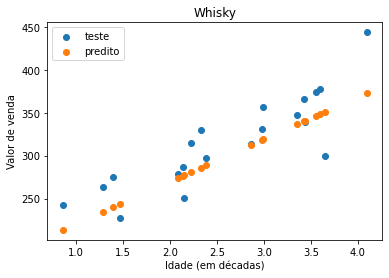

In [77]:
f, ax = plt.subplots()
ax.scatter(x_test,y_test,color='tab:blue',label='real')
ax.scatter(x_test,y_pred,color='tab:orange',label='predito')
ax.set_title('Whisky')
ax.set_xlabel('Idade (em décadas)')
ax.set_ylabel('Valor de venda')
plt.legend()
plt.show()

![mse](https://miro.medium.com/max/1198/1*BtVajQNj29LkVySEWR_4ww.png)

In [78]:
(y_test - y_pred)**2

array([8.49641493e+02, 4.98960398e+03, 6.29071571e+02, 1.15694572e+03,
       6.25493300e+01, 1.90641443e+03, 7.06388647e+02, 8.25693305e+02,
       4.38349080e+00, 8.08318348e+02, 2.62563379e+03, 1.73172111e+02,
       1.23044016e+03, 2.44019672e+01, 2.46785518e+02, 1.01792329e+02,
       8.34565619e+02, 9.13572239e-01, 1.05002802e+02, 1.47468260e+03])

In [79]:
np.mean((y_test - y_pred)**2)

937.8200387868299

In [82]:
mse = mean_squared_error(y_test,y_pred)
mse

937.8200387868299

In [81]:
np.mean((y_test - y_pred)**2) == mean_squared_error(y_test,y_pred)

True

# Root Mean Squared Error

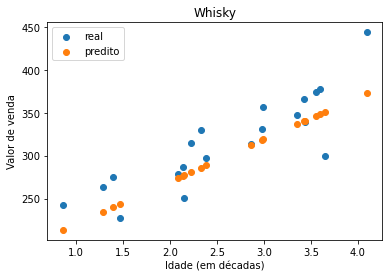

In [84]:
f, ax = plt.subplots()
ax.scatter(x_test,y_test,color='tab:blue',label='real')
ax.scatter(x_test,y_pred,color='tab:orange',label='predito')
ax.set_title('Whisky')
ax.set_xlabel('Idade (em décadas)')
ax.set_ylabel('Valor de venda')
plt.legend()
plt.show()

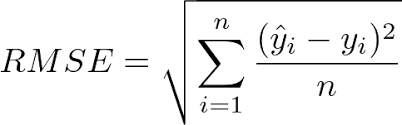

In [87]:
mse**1/2

468.9100193934149

In [89]:
mean_squared_error(y_test,y_pred)**1/2

468.9100193934149

# R2

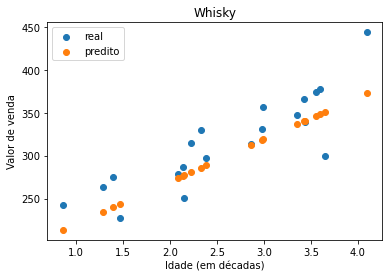

In [98]:
f, ax = plt.subplots()
ax.scatter(x_test,y_test,color='tab:blue',label='real')
ax.scatter(x_test,y_pred,color='tab:orange',label='predito')
ax.set_title('Whisky')
ax.set_xlabel('Idade (em décadas)')
ax.set_ylabel('Valor de venda')
plt.legend()
plt.show()

![](https://miro.medium.com/max/2812/1*_HbrAW-tMRBli6ASD5Bttw.png)

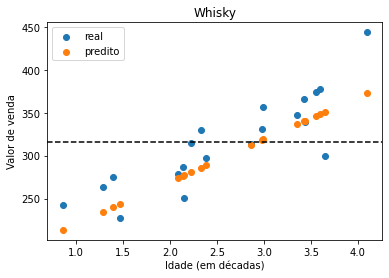

In [100]:
f, ax = plt.subplots()
ax.scatter(x_test,y_test,color='tab:blue',label='real')
ax.scatter(x_test,y_pred,color='tab:orange',label='predito')
ax.axhline(y_test.mean(),color='black',ls='--')
ax.set_title('Whisky')
ax.set_xlabel('Idade (em décadas)')
ax.set_ylabel('Valor de venda')
plt.legend()
plt.show()

In [102]:
sstot = sum((y_test - y_test.mean())**2)
sstot

54190.86593743

In [104]:
ssres = sum((y_test-y_pred)**2)
ssres

18756.400775736598

In [105]:
1 - (ssres/sstot)

0.653882615616566

In [106]:
r2_score(y_test,y_pred)

0.653882615616566

# Plots adicionais

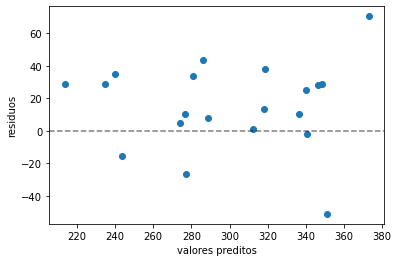

In [130]:
## plot de resíduos

f,ax = plt.subplots()
ax.scatter(y_pred,res)
ax.axhline(0,color='black',ls='--',alpha=0.5)
ax.set_xlabel('valores preditos')
ax.set_ylabel('residuos')
plt.show()

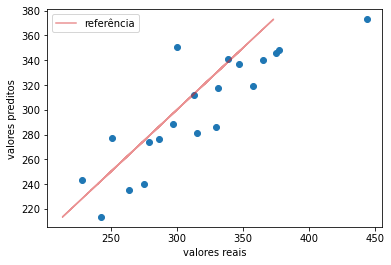

In [131]:
## plot de predições

f,ax = plt.subplots()

ax.scatter(y_test,y_pred)
ax.set_ylabel('valores preditos')
ax.set_xlabel('valores reais')
ax.plot(y_pred,y_pred,color='tab:red',label='referência',alpha=0.5)
plt.legend()

plt.show()